# Homework Assignment #2

*due Tuesday, February 12, 2019 by 11:59pm*

This homework is worth **10 points** [100%], there are no bonus points questions, however, up to 1 bonus point may be given for **clearly written code** (provided that the code is correct).

### n.b.
All deliverables are required to be typed and all graphs and statistical output generated in Jupyter Notebook using Python and associated packages. Deliverables with *any* handwritten elements will not be accepted and will receive a grade of zero. 

Similarly to `hw1` copy the whole directory `hw2` to your own private repository (**use the same one as for `hw1`**).

In [1]:
import numpy as np
import pandas as pd
from scipy.linalg import eigh
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1: Linear Regression - the closed form solution [total of 15%]

***DO NOT USE ANY REGRESSION FUNCTIONS OR REGRESSION PACKAGES FOR THIS PROBLEM***

### Data for Part 1:
Suggested steps:
* Read the [housing data](https://s3-us-west-1.amazonaws.com/usfca-cs686-ml/hw1/housing.csv) used in `hw1`
* Use the column "`GrLivArea`" as your independent variable and "`SalePrice`" as your dependent variable. (You can safely disregard the rest of the dataset)

In [18]:
df = pd.read_csv("../hw1/data/housing.csv").loc[:, ['GrLivArea','SalePrice']]

#### Find estimates for $\beta_0$ and $\beta_1$

$b_1 = \frac{\sum_{i=1}^n(x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^n(x_i - \overline{x})^2}$

In [20]:
x = df["GrLivArea"].mean()
y = df["SalePrice"].mean()
b1 = ((df["GrLivArea"] - x)*(df["SalePrice"] - y)).sum() / ((df["GrLivArea"] - x)**2).sum()
b1

107.13035896582517

$b_0 = \overline{y} - b_1\overline{x}$

In [21]:
b0 = y - b1*x
b0

18569.02585648728

#### Find $R^2$

$R^2 = (\frac{s_{xy}}{s_x s_y})^2 = (\frac{\sum_{i=1}^n(x_i - \overline{x})(y_i - \overline{y})}{(n-1)s_x s_y})^2 = \frac{(\sum_{i=1}^n(x_i - \overline{x})(y_i - \overline{y}))^2}{\sum_{i=1}^n(x_i - \overline{x})^2 \sum_{i=1}^n(y_i - \overline{y})^2}$

In [23]:
rs = (((df["GrLivArea"] - x)*(df["SalePrice"] - y)).sum())**2 \
    / (((df["GrLivArea"] - x)**2).sum() * ((df["SalePrice"] - y)**2).sum())
rs

0.502148650271804

## Part 2: Linear Regression - the iterative solution [total of 35%]

***YOU ARE ASKED TO CODE THE FOLLOWING EXERCISE FROM SCRATCH. DO NOT USE ANY PACKAGES FOR AUTOMATIC DIFFERENTIATION FOR THIS PROBLEM.***

### <span style="color: #DA122C;">**YOUR SOLUTION MUST WORK FOR ANY GIVEN NUMBER OF INDEPENDENT VARIABLES**</span>

HINT: To make your implementation stand out, try implementing this question following a functional programming paradigm (i.e. define functions)

In [57]:
## YOU WILL NEED THESE PARAMETERS ##
# DO NOT CHANGE ANYTHING IN THIS CELL
init_eta = 1e-4 # eta, gamma, learning rate or whatever you want to call it ¯\_(ツ)_/¯
num_iters = 100 # number of iterations
n = 1000

In [58]:
# DO NOT CHANGE ANYTHING IN THIS CELL
np.random.seed(42)
r = np.eye(int(np.sqrt(n)/3)-1)
r += np.random.normal(0, 0.1, size=(r.shape[0],)*2)
lams, A = eigh(r)
c = np.dot(A, np.diag(np.sqrt(lams)))
X = np.dot(c, norm.rvs(size=(r.shape[0], n))).transpose()
Y = np.random.randn(r.shape[0]+1).dot(np.concatenate((X, np.ones((n,1))), axis=1).transpose()) + np.random.normal(0, 0.5, n)
del r, lams, A, c

In [74]:
# Start your solution here with data X and labels Y
def gradientDescent(X, Y, eta, iters, num):
    m = len(y)
    t = np.ones(np.size(X,1))
    for i in range(iters):
        hypo = np.dot(X, t)
        gradient = np.dot(X.transpose(), hypo - y) / m
        t = t - eta * gradient
        cost = np.sum((hypo - Y)**2) / (m*2)
    return t, cost

## Part 3: Theory [total of 50%]

### Question 1

In the SLR model, the probability distribution of $Y$ (i.e., $Y_i$) has the same mean and variance for all levels of $X$ (i.e., $X_i$). True or False? Explain.

Answer:

False, in the case of $\beta_1 \neq 0$, the probability distribution of $Y$ has the same variance $\sigma^2$. However, the means are dependent on the value of $X$.

### Question 2

The number of points above the fitted regression line is always equal to the number of points below it. True or False? Explain.

Answer:

False, 

### Question 3

In a SLR model, what does $\beta_1$ measure?  

Answer:

$\beta_1$ is measureing the slope of the regression function, and whether or not dependent variable $Y$ and independent variable $X$ are linear assotiated

### Question 4

In the context of an SLR model, prove the following:

- $E[Y_i] = \beta_0 + \beta_1 X_i$ 
- $V(Y_i) = \sigma^2 \hspace{5pt} \forall \hspace{5pt} i$ 

Answer:

$Y_i = \beta_0 + \beta_1X_i + \epsilon_i \Longrightarrow E[Y_i] = E[\beta_0 + \beta_1X_i + \epsilon_i]
\Longrightarrow  E[Y_i] = E[\beta_0] + E[\beta_1X_i] + E[\epsilon_i]
\Longrightarrow E[Y_i] = \beta_0 + \beta_1E[X_i] + E[\epsilon_i]$

Since we know that $E[\epsilon_i \mid X_i] = 0$ and $X_i$ is a known constant

we can conclude that $E[Y_i] = \beta_0 + \beta_1E[X_i] + E[\epsilon_i] \Longrightarrow \beta_0 + \beta_1X_i$

$Y_i = \beta_0 + \beta_1X_i + \epsilon_i \Longrightarrow V[Y_i] = V[\beta_0 + \beta_1X_i + \epsilon_i]
\Longrightarrow  V[Y_i] = V[\beta_0] + V[\beta_1X_i] + V[\epsilon_i]
\Longrightarrow V[Y_i] = V[\epsilon_i]$

Since we know that $V[\sigma_i \mid X_i] = \sigma^2 \forall i$

we can conclude that $V[Y_i] = V[\epsilon_i] = \sigma^2$

### Question 5

For the SLR model, $Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$, how many random variables are there. Explain.

Answer:

There 2 random variables. The First one is random term $\epsilon_i$. And We Observe that response $Y_i$ is the sum of the constant term $\beta_0 + \beta_1X_i$ and $\epsilon_i$, so $Y_i$ is also a random variable.

### Question 6

Write out the normal error regression model and its assumptions (in English and math).

Answer:

Normal error regression model: $Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$

$Y_i$ is the value of response variable in the $i^th$ trial

$\beta_0$ and $\beta_1$ are parameters: $\beta_0$ is the $y$-intercept and $\beta_1$ is the slop of regression function

$X_i$ is a known constant, the value of the predictor variable in the $i^th$ trial

$\epsilon_i$ is a random error term that :
- $E[\epsilon_i \mid X_i] = 0$
- $V[\epsilon_i \mid X_i] = \sigma^2 \forall i$
- $\sigma[\epsilon_i,\epsilon_j \mid X_i] = 0 \forall i$,$j$; $i \neq j$
- $\sigma[X_i, \epsilon_i] = 0 \forall i$
- $\epsilon_i$ ~ $N(0,\sigma^2)$, $\epsilon_i$ is normally distributed

### Question 7

What does a negative value of $\beta_1$ indicate about the relation between $X$ and $Y$?

$$ b_0 = \frac{1}{n} \Big( \sum Y_i - b_1 \sum X_i \Big) $$
$$ b_1 = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sum (X_i - \bar{X})^2}$$

Answer:

It indicate that X and Y are negatively corelated, which means when X increase 1 unite, we expect on average Y decrease $\left|\beta_1\right|$

### Question 8

Are hypotheses tested concerning the actual values of the coefficients, e.g., $\beta_1$, or their estimated values, e.g., $b_1$? Why?

Answer:

Hypotheses test is concerning the actual values of the coefficients $\beta_1$, since we want to examine whether or not there is any linear association between the dependent variable $Y$ and the independent variable $X$, which is determine by whether $\beta_1 = 0$ 

### Question 9

You compute a coefficient of determination for a regression model an obtain an $R^2=0.832$. What does the strength of the coefficient of determination say about the causal relationship between the explanatory and response variables?

Answer:

The strength of coefficient of determination can only explain the goodness-of-fit of the regression line (The variation of response variable is smaller when $R^2$ is bigger), but it is not necessary explain the causal relationship. Like the relationship between number of people eat ice cream and number of people get bite by shark, the $R^2$ may be hight but it can not indicate any causal relationship between them

### Question 10

You compute a coefficient of determination for a regression model, regressing crime rate per capita ($Y$) on the size of municipal police force ($X$), obtaining an $R^2 = 0.6533$. What can you say about the relationship between $Y$ and $X$?

Answer:

While we obtain $R^2 = 0.6533$, we can only tell that $Y$ (crime rate per capita) and $X$ (size of municipal police force) may have some relationship between them. That is only the estimation of the strength of relation, but it does not imply the estimated line is good fitted 

### Question 11

From the discussion of SLR so far, how do you believe outliers will effect the regression line? 

Answer:

For SLR model, it is sensitive to outliers. The slope of the, $b_1$, and the y-intercept, $b_0$ still can be change seriously. I think the best way is to test with and without the outliers.

### Question 12

Write out the hypothesis test which tests for the statistical significance of $\beta_1$ for an SLR model. Be sure to include the null an alternate hypothesis, the critical value including degrees of freedom (two-tailed test) for $\alpha = 0.05$ and an interpretation of both possible results. 

Answer:

Hypothesis:

$H_0: \beta_1 = 0$

$H_1: \beta_1 \neq 0$

Calculation:

$t* = (b_1 - \beta_1)/s${$b_1$}

Since we lose 2 degrees of freedom to estimate $\beta_0$ and $\beta_1$ with $b_0$ and $b_1$

$(b_1 - \beta_1)/s${$b_1$} ~ $t(n-2)$

Conclusion:

Since it is two sided test, We can conclude that:

if $\left|t^*\right| \leq t(1-\alpha/2;n-2)$, do not reject $H_0: \beta_1=0$, that $\beta_1$ do not have statistical significance with 0 at $\alpha = 0.05$, which mean at $\alpha = 0.05$ we conclude that X and Y do not have any relationship.

if $\left|t^*\right| > t(1-\alpha/2;n-2)$, reject $H_0: \beta_1=0$ ,that $\beta_1$ have statistical significance with 0 at $\alpha = 0.05$, which mean at $\alpha = 0.05$ X and Y have some kind of relationship.

### Question 13

Using [```modified_SENIC_data_01.csv```](https://s3-us-west-1.amazonaws.com/usfca-cs686-ml/hw2/modified_SENIC_data_01.csv)
1. Regress Infection Risk ($Y$) on Length of Stay ($X$). Report the $R^2$, $b_0$ and $b_1$  values.
2. Multiply the observations, both $X$ and $Y$, by 192; we will refer to these as $X_{(2)}$ and $Y_{(2)}$. Regress $Y_{(2)}$ on $X_{(2)}$. Report the $R^2$, $b_0$ and $b_1$  values.
3. Multiply only $Y$ by 47; we will refer to this as $Y_{(3)}$. Regress $Y_{(3)}$ on $X$. Report the $R^2$, $b_0$ and $b_1$  values.
4. Multiply only $X$ by 12; we will refer to this as $X_{(3)}$. Regress $Y$ on $X_{(3)}$. Report the $R^2$, $b_0$ and $b_1$  values.


**Succinctly** explain what you have gleaned from this exercise. Include a summarized tabular representation of the regression output and the associated $R^2$, $b_0$ and $b_1$ values.

In [9]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
senic = pd.read_csv("data/modified_SENIC_data_01.csv")
senic = senic.loc[:, ['infectionRisk','lengthOfStay']]
senic_model = smf.ols('infectionRisk ~ lengthOfStay', senic).fit()
# senic_model.summary()
print("r-squared:", senic_model.rsquared)
print(senic_model.params)

r-squared: 0.284562320773181
Intercept       0.744304
lengthOfStay    0.374217
dtype: float64


In [11]:
senic2 = senic.transform(lambda x : x*192)
senic_model2 = smf.ols('infectionRisk ~ lengthOfStay', senic2).fit()
# senic_model2.summary()
print("r-squared:", senic_model2.rsquared)
print(senic_model2.params)

r-squared: 0.2845623207731809
Intercept       142.906319
lengthOfStay      0.374217
dtype: float64


In [12]:
senic3 = senic.transform(lambda x : x*47)
senic_model3 = smf.ols('infectionRisk ~ lengthOfStay', senic3).fit()
# senic_model3.summary()
print("r-squared:", senic_model3.rsquared)
print(senic_model3.params)

r-squared: 0.2845623207731811
Intercept       34.982276
lengthOfStay     0.374217
dtype: float64


In [13]:
senic4 = senic.transform(lambda x : x*12)
senic_model4 = smf.ols('infectionRisk ~ lengthOfStay', senic4).fit()
# senic_model4.summary()
print("r-squared:", senic_model4.rsquared)
print(senic_model4.params)

r-squared: 0.2845623207731811
Intercept       8.931645
lengthOfStay    0.374217
dtype: float64


In [41]:
d = {'name':['x','x192','x47','x12'],
        'R2':[senic_model.rsquared,senic_model2.rsquared,senic_model3.rsquared,senic_model4.rsquared],
        'b1':[senic_model.params['lengthOfStay'],senic_model2.params['lengthOfStay'],
              senic_model3.params['lengthOfStay'],senic_model4.params['lengthOfStay']],
        'b0':[senic_model.params['Intercept'],senic_model2.params['Intercept'],
              senic_model3.params['Intercept'],senic_model4.params['Intercept']]}
dataframe = pd.DataFrame(data=d)
dataframe

,name,R2,b1,b0
0,x,0.284562,0.374217,0.744304
1,x192,0.284562,0.374217,142.906319
2,x47,0.284562,0.374217,34.982276
3,x12,0.284562,0.374217,8.931645


If the dependent variable and independent variable mutiply by same number, no matter what the number is the slope of the regression line($b1$) and coefficient of determination($R^2$) wouldn't change. But the intercept($b0$) would be larger along with the number increase. (The result of $b_0$ would increase with same proportion, which mean result would be original $b_0$, 0.744304, mutiply by the number)

### Question 14

Using the [```fourDataSets.csv```](https://s3-us-west-1.amazonaws.com/usfca-cs686-ml/hw2/fourDataSets.csv), regress $Y$ on $X$ for $i=1,2,3,4$, i.e., generate four separate SLR models. **For each** of the four data sets, run and report summary statistics, generate a scatter plot and run a SLR model, reporting the regression function $R^2$, $R_a^2$, and the significance of $b_1$ ($p$-value). Intelligently discuss what you observe about each data set and the data sets as a whole.

In [44]:
import seaborn as sns
whole = pd.read_csv("data/fourDataSets.csv")
whole.drop(columns=['dataSet']).describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


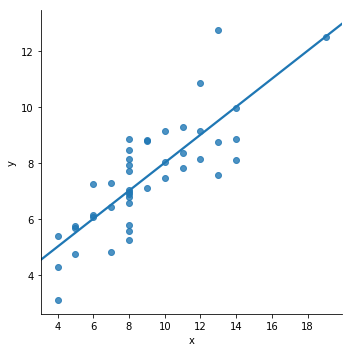

In [45]:
whole_plot = sns.lmplot("x", "y", data=whole, ci = None)

In [46]:
whole_model = smf.ols('y ~ x', whole).fit()
# whole_model.summary()
print("R-squared: ",whole_model.rsquared)
print("Adj. r-squared: ", whole_model.rsquared_adj)
print("b1 p-value:", whole_model.pvalues['x'])

R-squared:  0.6664538423204793
Adj. r-squared:  0.6585122671376336
b1 p-value: 1.4365052916298407e-11


In [47]:
one = whole[whole['dataSet']==1]
one.drop(columns=['dataSet']).describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


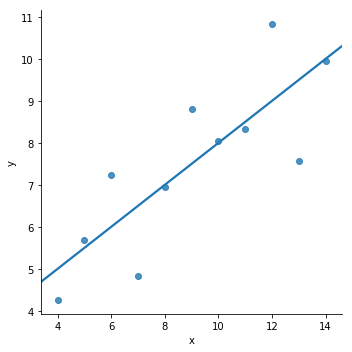

In [48]:
one_plot = sns.lmplot("x", "y", data=one, ci = None)

In [49]:
one_model = smf.ols('y ~ x', one).fit()
# one_model.summary()
print("R-squared: ",one_model.rsquared)
print("Adj. r-squared: ", one_model.rsquared_adj)
print("b1 p-value:", one_model.pvalues['x'])

R-squared:  0.666542459508775
Adj. r-squared:  0.6294916216764166
b1 p-value: 0.002169628873078794


In [52]:
two = whole[whole['dataSet']==2]
two.drop(columns=['dataSet']).describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


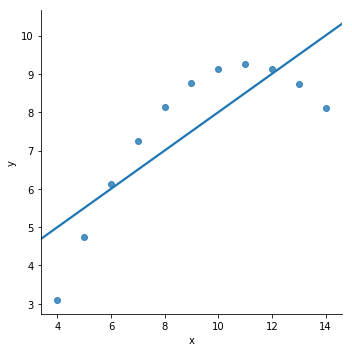

In [51]:
two_plot = sns.lmplot("x", "y", data=two, ci = None)

In [33]:
two_model = smf.ols('y ~ x', two).fit()
# two_model.summary()
print("R-squared: ",two_model.rsquared)
print("Adj. r-squared: ", two_model.rsquared_adj)
print("b1 p-value:", two_model.pvalues['x'])

R-squared:  0.6662420337274844
Adj. r-squared:  0.6291578152527604
b1 p-value: 0.0021788162369108005


In [53]:
three = whole[whole['dataSet']==3]
three.drop(columns=['dataSet']).describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


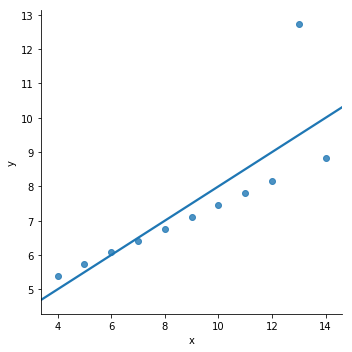

In [54]:
three_plot = sns.lmplot("x", "y", data=three, ci = None)

In [35]:
three_model = smf.ols('y ~ x', three).fit()
# three_model.summary()
print("R-squared: ",three_model.rsquared)
print("Adj. r-squared: ", three_model.rsquared_adj)
print("b1 p-value:", three_model.pvalues['x'])

R-squared:  0.6663240410665593
Adj. r-squared:  0.6292489345183991
b1 p-value: 0.002176305279228019


In [56]:
four = whole[whole['dataSet']==4]
four.drop(columns=['dataSet']).describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


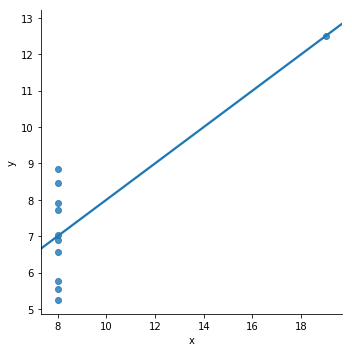

In [55]:
four_plot = sns.lmplot("x", "y", data=four, ci = None)

In [37]:
four_model = smf.ols('y ~ x', four).fit()
# four_model.summary()
print("R-squared: ", four_model.rsquared)
print("Adj. r-squared: ", four_model.rsquared_adj)
print("b1 p-value:", four_model.pvalues['x'])

R-squared:  0.6667072568984653
Adj. r-squared:  0.6296747298871836
b1 p-value: 0.00216460234719722


Answer:

Even the mean, standard diviation of x, y, p-value ($b_1$) and r-squared are same for this four datasets and whole dataset, we can not tell that the estimated regression line is good fitted and this is a good model for this datasets.